<a href="https://colab.research.google.com/github/Aratiganesh123/Grozi120---ResNet50/blob/master/Grozi_Resnet50_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os


# 'mkdir' creates a directory in current directory.
os.mkdir('DataDir') 

FileExistsError: ignored

In [ ]:
###ignore this cell
import cv2
path='/content/drive/MyDrive/grozi/'
grocery_types=os.listdir('/content/drive/MyDrive/grozi')



for i in grocery_types:
    data_path=path+str(i)+'/'+'video'
    filenames=[i for i in os.listdir(data_path)]
    #print(filenames)
    
    for f in filenames:
        print(data_path+'/'+f)
        img=cv2.imread(data_path+'/'+f)
        cv2.imwrite(os.path.join('/content/DataDir' ,f), img)
       

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/grozi/6/video/video89.png
/content/drive/MyDrive/grozi/6/video/video94.png
/content/drive/MyDrive/grozi/6/video/video15.png
/content/drive/MyDrive/grozi/6/video/video68.png
/content/drive/MyDrive/grozi/6/video/video7.png
/content/drive/MyDrive/grozi/6/video/video22.png
/content/drive/MyDrive/grozi/6/video/video26.png
/content/drive/MyDrive/grozi/6/video/video12.png
/content/drive/MyDrive/grozi/6/video/video99.png
/content/drive/MyDrive/grozi/6/video/video86.png
/content/drive/MyDrive/grozi/6/video/video18.png
/content/drive/MyDrive/grozi/6/video/video95.png
/content/drive/MyDrive/grozi/83/video/video22.png
/content/drive/MyDrive/grozi/83/video/video14.png
/content/drive/MyDrive/grozi/83/video/video21.png
/content/drive/MyDrive/grozi/83/video/video28.png
/content/drive/MyDrive/grozi/83/video/video18.png
/content/drive/MyDrive/grozi/83/video/video4.png
/content/drive/MyDrive/grozi/83/video/video16.png
/content/driv

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/grozi')

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11194 files belonging to 120 classes.
Using 8956 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
 
 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11194 files belonging to 120 classes.
Using 2238 files for validation.


['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


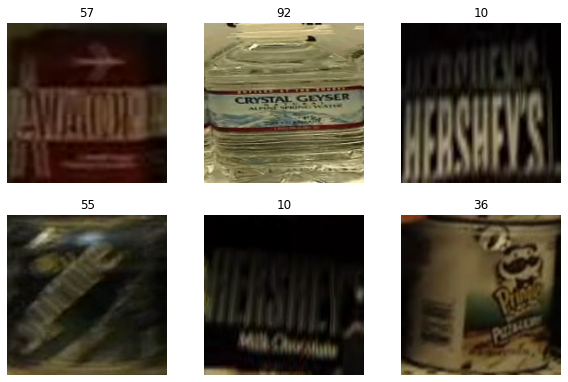

In [ ]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# New Section

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=120,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(120, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_7 (Dense)              (None, 120)               61560     
Total params: 24,698,360
Trainable params: 1,110,648
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
280/280 [==============================] - 66s 221ms/step - loss: 0.4855 - accuracy: 0.9060 - val_loss: 0.0502 - val_accuracy: 0.9857
Epoch 2/10
280/280 [==============================] - 61s 216ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.0122 - val_accuracy: 0.9978
Epoch 3/10
280/280 [==============================] - 61s 216ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0105 - val_accuracy: 0.9982
Epoch 4/10
280/280 [==============================] - 61s 216ms/step - loss: 9.0471e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9987
Epoch 5/10
280/280 [==============================] - 61s 216ms/step - loss: 5.0623e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9987
Epoch 6/10
280/280 [==============================] - 61s 216ms/step - loss: 3.5800e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 7/10
280/280 [==============================] - 61s 215ms/step - loss: 2.7754e-04 - accuracy: 1.0000 - val_loss:

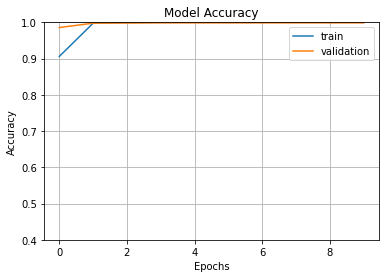

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
image=cv2.imread('/content/drive/MyDrive/grozi/103/video/video1.png')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [ ]:
pred=resnet_model.predict(image)

In [ ]:
class_names = train_ds.class_names
print(class_names)


['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [ ]:
#class_names=[i for i in range(1,120)]
#print(class_names)
output_class=class_names[np.argmax(pred)]
print(output_class)
print("The predicted class is", output_class)

103
The predicted class is 103
